# Cellpose Batch Processing for TIFF Files
This notebook processes all TIFF files in a specified folder using Cellpose.

In [1]:
# Import required libraries
import os
import numpy as np
from pathlib import Path
from cellpose import models, io
from skimage import io as skio
import matplotlib.pyplot as plt



In [2]:
# Configuration
input_folder = "./data/images"  # Change this to your folder path
output_folder = "./data/instance_masks"    # Where to save results
model_type = "cyto3"  # Options: 'cyto', 'cyto2', 'cyto3', 'nuclei'
channels = [0, 0]  # [cytoplasm_channel, nucleus_channel], use [0,0] for grayscale
diameter = None  # Approximate cell diameter in pixels (None for auto-detection)
flow_threshold = 0.4  # Default: 0.4
cellprob_threshold = 0.0  # Default: 0.0

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

In [3]:
# Get all TIFF files from folder
tiff_extensions = ['*.tiff', '*.tif', '*.TIF', '*.TIFF']
image_files = []

for ext in tiff_extensions:
    image_files.extend(Path(input_folder).glob(ext))

image_files = sorted([str(f) for f in image_files])
print(f"Found {len(image_files)} TIFF files")
for f in image_files[:5]:  # Show first 5 files
    print(f"  - {os.path.basename(f)}")

Found 20 TIFF files
  - 20211222_094342_petiole_test_00100.tiff
  - 20211222_094342_petiole_test_00200.tiff
  - 20211222_094342_petiole_test_00300.tiff
  - 20211222_094342_petiole_test_00400.tiff
  - 20211222_094342_petiole_test_00500.tiff


In [4]:
# Initialize Cellpose model
# Use GPU if available (gpu=True), otherwise CPU (gpu=False)
model = models.CellposeModel(gpu=True, model_type=model_type)
print(f"Loaded {model_type} model")
print(f"Using GPU: {model.gpu}")

model_type argument is not used in v4.0.1+. Ignoring this argument...
100%|██████████| 1.15G/1.15G [00:07<00:00, 160MB/s] 


Loaded cyto3 model
Using GPU: True


In [6]:
# Process all images
results = []

for i, img_path in enumerate(image_files):
    print(f"\nProcessing {i+1}/{len(image_files)}: {os.path.basename(img_path)}")
    
    try:
        # Read image
        img = skio.imread(img_path)
        print(f"  Image shape: {img.shape}")
        
        # Run Cellpose - v4 returns only 3 values (masks, flows, styles)
        masks, flows, styles = model.eval(
            img, 
            diameter=diameter,
            flow_threshold=flow_threshold,
            cellprob_threshold=cellprob_threshold
        )
        
        # Count cells
        n_cells = len(np.unique(masks)) - 1  # Subtract background
        print(f"  Detected {n_cells} cells")
        
        # Save results
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        
        # Save masks as TIFF only
        skio.imsave(os.path.join(output_folder, f"{base_name}_masks.tif"), masks.astype(np.uint16))
        
        results.append({
            'filename': os.path.basename(img_path),
            'n_cells': n_cells,
            'diameter_used': diameter  # Use the parameter value instead
        })
        
    except Exception as e:
        print(f"  ERROR: {str(e)}")
        results.append({
            'filename': os.path.basename(img_path),
            'n_cells': 'ERROR',
            'diameter_used': 'ERROR'
        })

print("\n=== Processing Complete ===")


Processing 1/20: 20211222_094342_petiole_test_00100.tiff
  Image shape: (2560, 2560)
  Detected 1654 cells

Processing 2/20: 20211222_094342_petiole_test_00200.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_094342_petiole_test_00100_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1790 cells

Processing 3/20: 20211222_094342_petiole_test_00300.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_094342_petiole_test_00200_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1791 cells

Processing 4/20: 20211222_094342_petiole_test_00400.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_094342_petiole_test_00300_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1873 cells

Processing 5/20: 20211222_094342_petiole_test_00500.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_094342_petiole_test_00400_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1821 cells

Processing 6/20: 20211222_104840_petiole_test2_00100.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_094342_petiole_test_00500_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1990 cells

Processing 7/20: 20211222_104840_petiole_test2_00200.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_104840_petiole_test2_00100_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2210 cells

Processing 8/20: 20211222_104840_petiole_test2_00300.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_104840_petiole_test2_00200_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2356 cells

Processing 9/20: 20211222_104840_petiole_test2_00400.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_104840_petiole_test2_00300_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2433 cells

Processing 10/20: 20211222_104840_petiole_test2_00500.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_104840_petiole_test2_00400_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2565 cells

Processing 11/20: 20211222_113313_petiole3_00100.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_104840_petiole_test2_00500_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1761 cells

Processing 12/20: 20211222_113313_petiole3_00200.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_113313_petiole3_00100_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1851 cells

Processing 13/20: 20211222_113313_petiole3_00300.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_113313_petiole3_00200_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1968 cells

Processing 14/20: 20211222_113313_petiole3_00400.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_113313_petiole3_00300_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 1942 cells

Processing 15/20: 20211222_113313_petiole3_00500.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_113313_petiole3_00400_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2214 cells

Processing 16/20: 20211222_125057_petiole4_00100.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_113313_petiole3_00500_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2293 cells

Processing 17/20: 20211222_125057_petiole4_00200.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_125057_petiole4_00100_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2378 cells

Processing 18/20: 20211222_125057_petiole4_00300.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_125057_petiole4_00200_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2426 cells

Processing 19/20: 20211222_125057_petiole4_00400.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_125057_petiole4_00300_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2546 cells

Processing 20/20: 20211222_125057_petiole4_00500.tiff
  Image shape: (2560, 2560)


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_125057_petiole4_00400_masks.tif is a low contrast image
  return func(*args, **kwargs)


  Detected 2491 cells

=== Processing Complete ===


/pscratch/sd/x/xchong/envs/cellpose/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./data/instance_masks/20211222_125057_petiole4_00500_masks.tif is a low contrast image
  return func(*args, **kwargs)


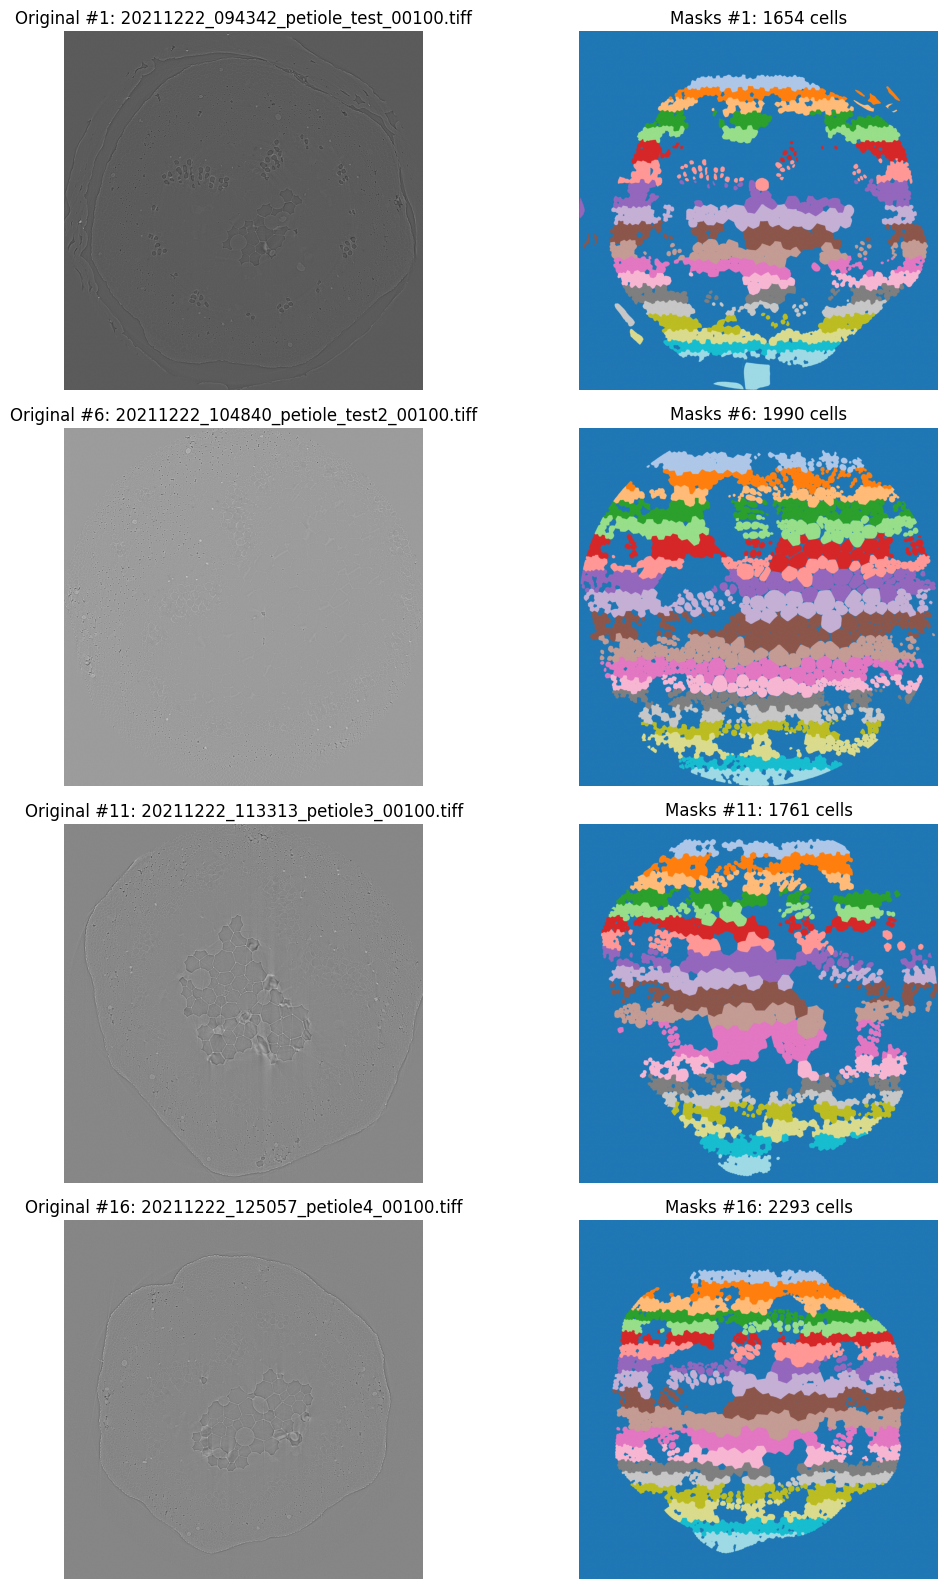

In [8]:
# Visualize specific results (1st, 6th, 11th, 16th images)
sample_indices = [0, 5, 10, 15]  # 0-indexed: 1st, 6th, 11th, 16th
sample_indices = [i for i in sample_indices if i < len(image_files)]  # Only valid indices
n_samples = len(sample_indices)

fig, axes = plt.subplots(n_samples, 2, figsize=(12, 4*n_samples))
if n_samples == 1:
    axes = axes.reshape(1, -1)

for plot_idx, img_idx in enumerate(sample_indices):
    # Load original image
    img = skio.imread(image_files[img_idx])
    
    # Load corresponding mask
    base_name = os.path.splitext(os.path.basename(image_files[img_idx]))[0]
    masks = skio.imread(os.path.join(output_folder, f"{base_name}_masks.tif"))
    
    # Display original
    axes[plot_idx, 0].imshow(img, cmap='gray')
    axes[plot_idx, 0].set_title(f"Original #{img_idx+1}: {os.path.basename(image_files[img_idx])}")
    axes[plot_idx, 0].axis('off')
    
    # Display masks
    axes[plot_idx, 1].imshow(masks, cmap='tab20')
    axes[plot_idx, 1].set_title(f"Masks #{img_idx+1}: {results[img_idx]['n_cells']} cells")
    axes[plot_idx, 1].axis('off')

plt.tight_layout()
plt.show()